In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
sb.set()

In [3]:
# Import the data set
DAM_Vehicle = pd.read_csv('DAM_Vehicle.csv')
DAM_Vehicle.head()

,Compactness,Circularity,Distance Circularity,Radius Ratio,PR. Axis Aspect Ratio,Max Length Aspect Ratio,Scatter Ratio,Elongatedness,PR. Axis Rectangularity,Max Length Rectangularity,Scaled Variance Along Major Axis,Scaled Variance Along Minor Axis,Scaled Radius of Gyration,Skewness About Major Axis,Skewness About Minor Axis,Kurtosis About Minor Axis,Kurtosis About Major Axis,Hollows Ratio,Type of Vehicle
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [5]:
DAM_Vehicle = DAM_Vehicle.astype({"Type of Vehicle":'category'})

In [6]:
DAM_Vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
Compactness                         846 non-null int64
Circularity                         846 non-null int64
Distance Circularity                846 non-null int64
Radius Ratio                        846 non-null int64
PR. Axis Aspect Ratio               846 non-null int64
Max Length Aspect Ratio             846 non-null int64
Scatter Ratio                       846 non-null int64
Elongatedness                       846 non-null int64
PR. Axis Rectangularity             846 non-null int64
Max Length Rectangularity           846 non-null int64
Scaled Variance Along Major Axis    846 non-null int64
Scaled Variance Along Minor Axis    846 non-null int64
Scaled Radius of Gyration           846 non-null int64
Skewness About Major Axis           846 non-null int64
Skewness About Minor Axis           846 non-null int64
Kurtosis About Minor Axis           846 non-null int64
Kurtosis About 

In [9]:
vehicle_type = pd.DataFrame(DAM_Vehicle['Type of Vehicle'])
vehicle_type.head()

,Type of Vehicle
0,van
1,van
2,saab
3,van
4,bus


In [10]:
condition1 = DAM_Vehicle['Type of Vehicle']=="van"
condition1.value_counts()

False    647
True     199
Name: Type of Vehicle, dtype: int64

In [13]:
Compactness = pd.DataFrame(DAM_Vehicle['Compactness'])
Circularity = pd.DataFrame(DAM_Vehicle['Circularity'])
Distance_Circularity = pd.DataFrame(DAM_Vehicle['Distance Circularity'])
Radius_Ratio = pd.DataFrame(DAM_Vehicle['Radius Ratio'])
PR_Axis_Aspect_Ratio = pd.DataFrame(DAM_Vehicle['PR. Axis Aspect Ratio'])
Max_Length_Aspect_Ratio = pd.DataFrame(DAM_Vehicle['Max Length Aspect Ratio'])
Scatter_Ratio = pd.DataFrame(DAM_Vehicle['Scatter Ratio'])
Elongatedness = pd.DataFrame(DAM_Vehicle['Elongatedness'])
PR_Axis_Rectangularity = pd.DataFrame(DAM_Vehicle['PR. Axis Rectangularity'])
Max_Length_Rectangularity = pd.DataFrame(DAM_Vehicle['Max Length Rectangularity'])
Scaled_Variance_Along_Major_Axis = pd.DataFrame(DAM_Vehicle['Scaled Variance Along Major Axis'])
Scaled_Variance_Along_Minor_Axis = pd.DataFrame(DAM_Vehicle['Scaled Variance Along Minor Axis'])
Scaled_Radius_of_Gyration = pd.DataFrame(DAM_Vehicle['Scaled Radius of Gyration'])
Skewness_About_Major_Axis = pd.DataFrame(DAM_Vehicle['Skewness About Major Axis'])
Skewness_About_Minor_Axis = pd.DataFrame(DAM_Vehicle['Skewness About Minor Axis'])
Kurtosis_About_Minor_Axis = pd.DataFrame(DAM_Vehicle['Kurtosis About Minor Axis'])
Kurtosis_About_Major_Axis = pd.DataFrame(DAM_Vehicle['Kurtosis About Major Axis'])
Hollows_Ratio = pd.DataFrame(DAM_Vehicle['Hollows Ratio'])

# uni variate decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Function to calculate decision tree accuracies for individual factors
def acc_score (X):
    # Split the Dataset into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(X, vehicle_type, test_size = 0.25)
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = None)  # Create the decision tree object
    dectree.fit(x_train, y_train)  
    return dectree.score(x_test, y_test)

In [14]:
score = [acc_score(Compactness), acc_score(Circularity), acc_score(Distance_Circularity), acc_score(Radius_Ratio), acc_score(PR_Axis_Aspect_Ratio), 
         acc_score(Max_Length_Aspect_Ratio), acc_score(Scatter_Ratio), acc_score(Elongatedness), acc_score(PR_Axis_Rectangularity), acc_score(Max_Length_Rectangularity),
        acc_score(Scaled_Variance_Along_Major_Axis), acc_score(Scaled_Variance_Along_Minor_Axis), acc_score(Scaled_Radius_of_Gyration),
        acc_score(Skewness_About_Major_Axis), acc_score(Skewness_About_Minor_Axis), acc_score(Kurtosis_About_Minor_Axis), acc_score(Kurtosis_About_Major_Axis),
        acc_score(Hollows_Ratio)]        
score_factors = pd.DataFrame(score, columns = ['Accuracy Score'], 
                      index = ['Compactness', 'Circularity', 'Distance_Circularity', 'Radius_Ratio',
                               'PR_Axis_Aspect_Ratio', 'Max_Length_Aspect_Ratio', 'Scatter_Ratio', 'Elongatedness',
                              'PR_Axis_Rectangularity', 'Max_Length_Rectangularity', 'Scaled_Variance_Along_Major_Axis',
                              'Scaled_Variance_Along_Minor_Axis','Scaled_Radius_of_Gyration','Skewness_About_Major_Axis',
                              'Skewness_About_Minor_Axis','Kurtosis_About_Minor_Axis','Kurtosis_About_Major_Axis','Hollows_Ratio'])
score_factors.sort_values(by = 'Accuracy Score')

,Accuracy Score
Skewness_About_Minor_Axis,0.254717
Kurtosis_About_Minor_Axis,0.301887
PR_Axis_Aspect_Ratio,0.325472
Scaled_Radius_of_Gyration,0.330189
Kurtosis_About_Major_Axis,0.349057
Hollows_Ratio,0.391509
Radius_Ratio,0.391509
Max_Length_Rectangularity,0.396226
Skewness_About_Major_Axis,0.415094
Compactness,0.415094


# multivariate decision tree

In [15]:
# Concat all the individual factors
factors2 = pd.concat([ Compactness, Circularity, Distance_Circularity, Radius_Ratio,
                               PR_Axis_Aspect_Ratio, Max_Length_Aspect_Ratio, Scatter_Ratio, Elongatedness,
                              PR_Axis_Rectangularity, Max_Length_Rectangularity, Scaled_Variance_Along_Major_Axis,
                              Scaled_Variance_Along_Minor_Axis,Scaled_Radius_of_Gyration,Skewness_About_Major_Axis,
                              Skewness_About_Minor_Axis,Kurtosis_About_Minor_Axis,Kurtosis_About_Major_Axis,Hollows_Ratio], sort = False, axis = 1)
factors2.head()

,Compactness,Circularity,Distance Circularity,Radius Ratio,PR. Axis Aspect Ratio,Max Length Aspect Ratio,Scatter Ratio,Elongatedness,PR. Axis Rectangularity,Max Length Rectangularity,Scaled Variance Along Major Axis,Scaled Variance Along Minor Axis,Scaled Radius of Gyration,Skewness About Major Axis,Skewness About Minor Axis,Kurtosis About Minor Axis,Kurtosis About Major Axis,Hollows Ratio
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [16]:
# Extract Response and Predictors
y = vehicle_type
X = pd.DataFrame(factors2)
X.head()

,Compactness,Circularity,Distance Circularity,Radius Ratio,PR. Axis Aspect Ratio,Max Length Aspect Ratio,Scatter Ratio,Elongatedness,PR. Axis Rectangularity,Max Length Rectangularity,Scaled Variance Along Major Axis,Scaled Variance Along Minor Axis,Scaled Radius of Gyration,Skewness About Major Axis,Skewness About Minor Axis,Kurtosis About Minor Axis,Kurtosis About Major Axis,Hollows Ratio
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [17]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (634, 1) (634, 18)
Test Set  : (212, 1) (212, 18)


In [18]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # Create the decision tree object
# Fit Decision Tree on Train Data 
dectree.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.7271293375394322

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.6556603773584906



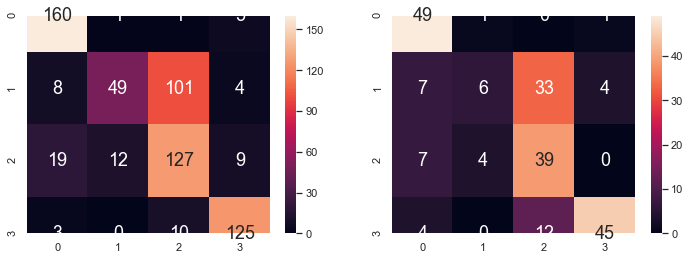

In [21]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])